In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
w = 40
h = 40

dt = 0.0001
dx = 1
dy = 1

Re = 500

POISSON_THRESHOLD = 1e-1

In [3]:
u = np.zeros([w,h])
v = np.zeros([w,h])
p = np.zeros([w,h])

In [4]:
def step(up,vp,pp):
    ud = np.zeros([w,h])
    udd = np.zeros([w,h])

    vd = np.zeros([w,h])
    vdd = np.zeros([w,h])
    
    un = np.zeros([w,h])
    vn = np.zeros([w,h])

    for i in range(1,w-1):
        for j in range(1,h-1):
            ud[i,j] = (up[i-1,j] + up[i-1,j+1])/2

            udd[i,j] = (up[i,j] + up[i,j+1])/2

            vd[i,j] = (vp[i,j] + vp[i+1,j])/2

            vdd[i,j] = (vp[i,j-1] + vp[i+1,j-1])/2

    p = np.zeros([w,h]) # prime pressure field
    not_solved = True
    count = 0
    while not_solved:
        prev = np.copy(p)
        count = count + 1
        for i in range(1,w-1):
            for j in range(1,h-1):
                a = 2*dt*(1/(dx**2) + 1/(dy**2))
                b = -dt/(dx**2)
                c = -dt/(dy**2)

                d = (up[i,j] - up[i-1,j])/dx + (vp[i,j] - vp[i,j-1])/dy

                p[i,j] = -(b*(p[i+1,j] + p[i-1,j]) + c*(p[i,j+1] + p[i,j-1]) + d)/a
                
        if np.linalg.norm(prev - p) < POISSON_THRESHOLD:
            not_solved = False
            print("Solved poisson in", count, "steps")
        else:
            if count % 100 == 0:
                print(count, np.linalg.norm(prev - p))
    pn = pp + p

    for i in range(1,w-1):
        for j in range(1,h-1): 
            a1 = -(up[i+1,j]**2 - up[i-1,j]**2)/(2*dx) - (up[i,j+1]*vd[i,j+1] - up[i,j-1]*vdd[i,j-1])/(2*dy)
            b1 = -(vp[i,j+1]**2 - vp[i,j-1]**2)/(2*dy) - (vp[i+1,j]*ud[i+1,j] - vp[i-1,j]*udd[i-1,j])/(2*dx)

            a3 = (up[i+1,j] - 2*up[i,j] + up[i-1,j])/(dx**2)
            a4 = (up[i,j+1] - 2*up[i,j] + up[i,j-1])/(dy**2)

            b3 = (vp[i,j+1] - 2*vp[i,j] + vp[i,j-1])/(dy**2)
            b4 = (vp[i+1,j] - 2*vp[i,j] + vp[i-1,j])/(dx**2)

            A = -a1 + (a3 + a4)/Re
            B = -b1 + (b3 + b4)/Re

            un[i,j] = up[i,j] + dt * (A - (p[i+1,j] - pn[i,j])/dx)
            vn[i,j] = vp[i,j] + dt * (B - (p[i,j+1] - pn[i,j])/dy)
    
    ## copy boundary conditions & update Newmann BC
    # Apply BC
    for i in range(w):
        un[i,0] = up[i,0]
        vn[i,0] = vp[i,0]
        
        un[i,h-1] = up[i,h-1]
        vn[i,h-1] = vp[i,h-1]
        
        pn[i,0] = pn[i,1]
        pn[i,h-1] = pn[i,h-2]
        
    for j in range(h):
        un[0,i] = up[0,i]
        vn[0,i] = vp[0,i]
        
        un[w-1,i] = up[w-1,i]
        vn[w-1,i] = vp[w-1,i]
        
        pn[0,i] = pn[1,i]
        pn[w-1,i] = pn[w-2,i]
        
    # take care of the corners
    pn[0,0] = pn[1,1]
    pn[-1,-1] = pn[-2,-2]
    pn[-1,0] = pn[-2,1]
    pn[0,-1] = pn[1,-2]

            
    return un, vn, pn

100 48.79469116435335
200 21.50619703927366
300 10.85132427104017
400 5.619703998719949
500 2.927616899018573
600 1.5276826654840439
700 0.7976027553962997
800 0.41650804609310554
900 0.21751578649728534
1000 0.11359771784217328
Solved poisson in 1020 steps


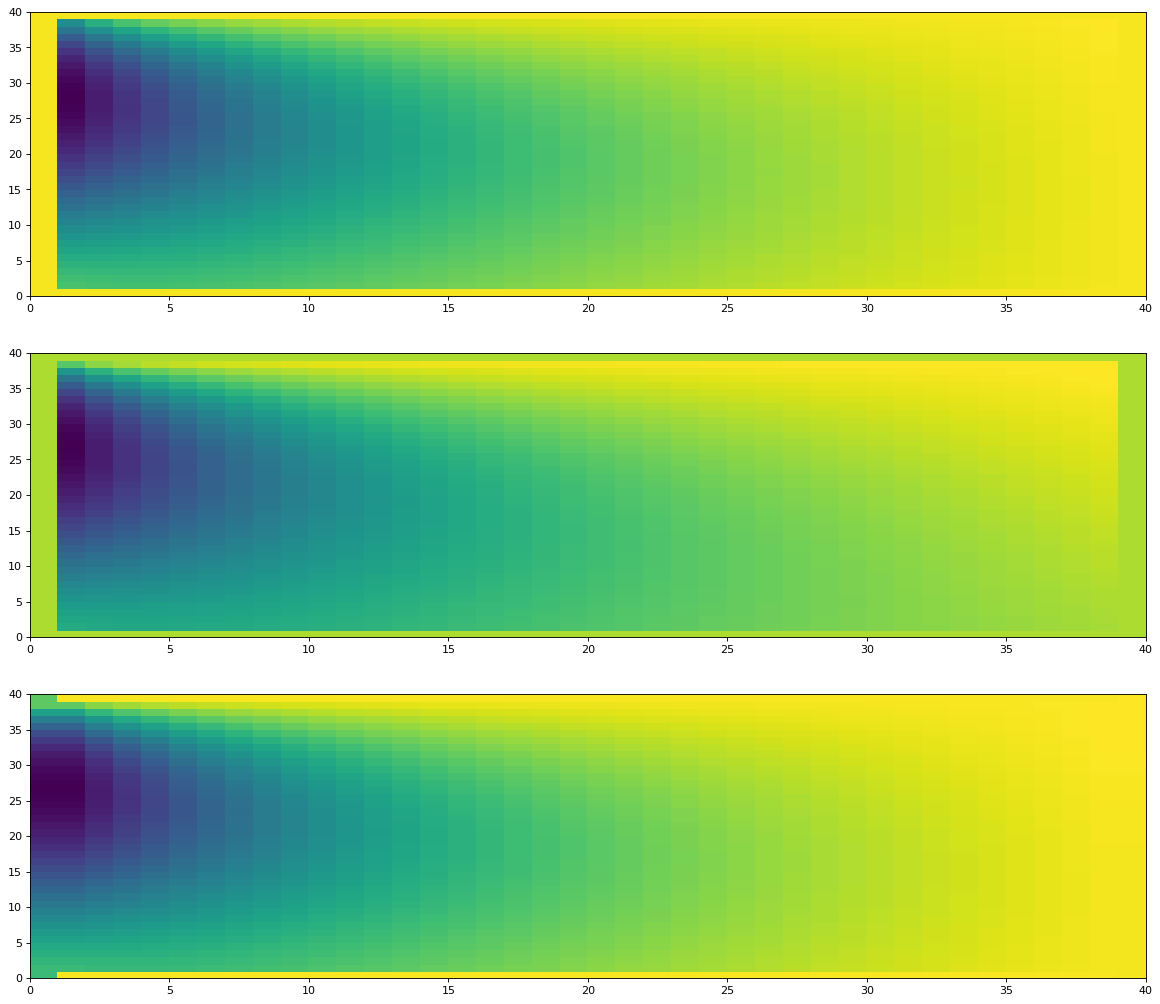

In [144]:
u, v, p = step(u,v,p)

fig=plt.figure(figsize=(18, 16), dpi= 80, facecolor='w', edgecolor='k')

plt.subplot(3,1,1)
plt.pcolor(u)
plt.subplot(3,1,2)
plt.pcolor(v)
plt.subplot(3,1,3)
plt.pcolor(p)

In [ ]:
#plt.colorbar()
for t in range(1000):
    u, v, p = step(u,v,p)
    print(t)
    #fig=plt.figure(figsize=(18, 16), dpi= 80, facecolor='w', edgecolor='k')
    plt.subplot(3,1,1)
    plt.pcolor(u)
    plt.subplot(3,1,2)
    plt.pcolor(v)
    plt.subplot(3,1,3)
    plt.pcolor(p)
    #mag = u**2 + v**2
    #plt.imshow(mag)
    #plt.show()
    plt.savefig("mag%d.png" % t)
    
    X, Y = np.mgrid[0:h, 0:w]
    mag = np.sqrt(u**2 + v**2)
    plt.figure(figsize=(10, 10))
    im = plt.imshow(-mag, cmap=plt.cm.RdYlBu, interpolation='none', origin='lower')
    plt.quiver(Y, X, v, u, angles='xy', scale_units='xy')
    #plt.show()
    plt.savefig("arr%d.png" % t)

100 164.01987739237603
200 68.85077535948659
300 34.53254553751815
400 17.888238239201304
500 9.323512609552475
600 4.866344842381947
700 2.5409684304865023
800 1.3269442744320212
900 0.6929891286875832
1000 0.3619158879187646
1100 0.18901299962893225
Solved poisson in 1199 steps
0
100 152.82989264699464
200 64.63478660911723
300 32.45463337490342
400 16.813260019128382
500 8.763038995289278
600 4.573738264053433
700 2.388166938441885
800 1.2471448415296231
900 0.651313633366658
1000 0.34015058371184226
1100 0.1776458964036807
Solved poisson in 1189 steps
1
100 823.8181533393498
200 390.0305862861613
300 201.55954141460643
400 105.24724975067437
500 54.99163539902108
600 28.726981570704787
700 15.00447534766089
800 7.836536545430518
900 4.092763127919046
1000 2.137493839203962
1100 1.1163272988239938
1200 0.5830121678827668
1300 0.30448329198739377
1400 0.15901907714807953
Solved poisson in 1472 steps
2
100 1408.473859487145
200 665.1358154024637
300 344.08208529025944
400 179.78853829

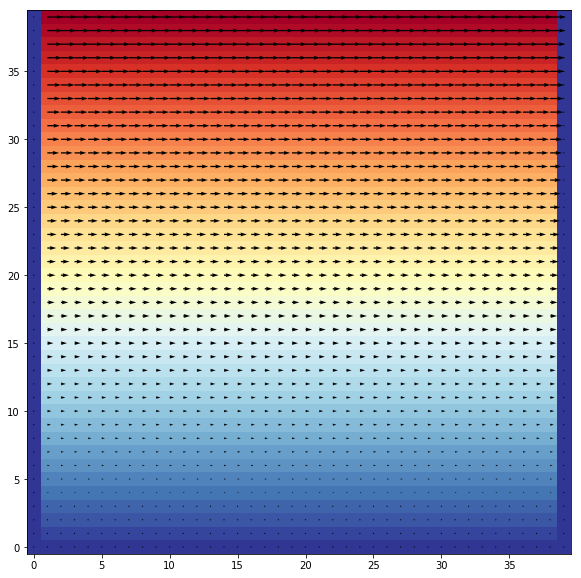

In [7]:
X, Y = np.mgrid[0:h, 0:w]
mag = np.sqrt(u**2 + v**2)
plt.figure(figsize=(10, 10))
im = plt.imshow(-mag, cmap=plt.cm.RdYlBu, interpolation='none', origin='lower')
plt.quiver(Y, X, v, u, angles='xy', scale_units='xy')
plt.show()

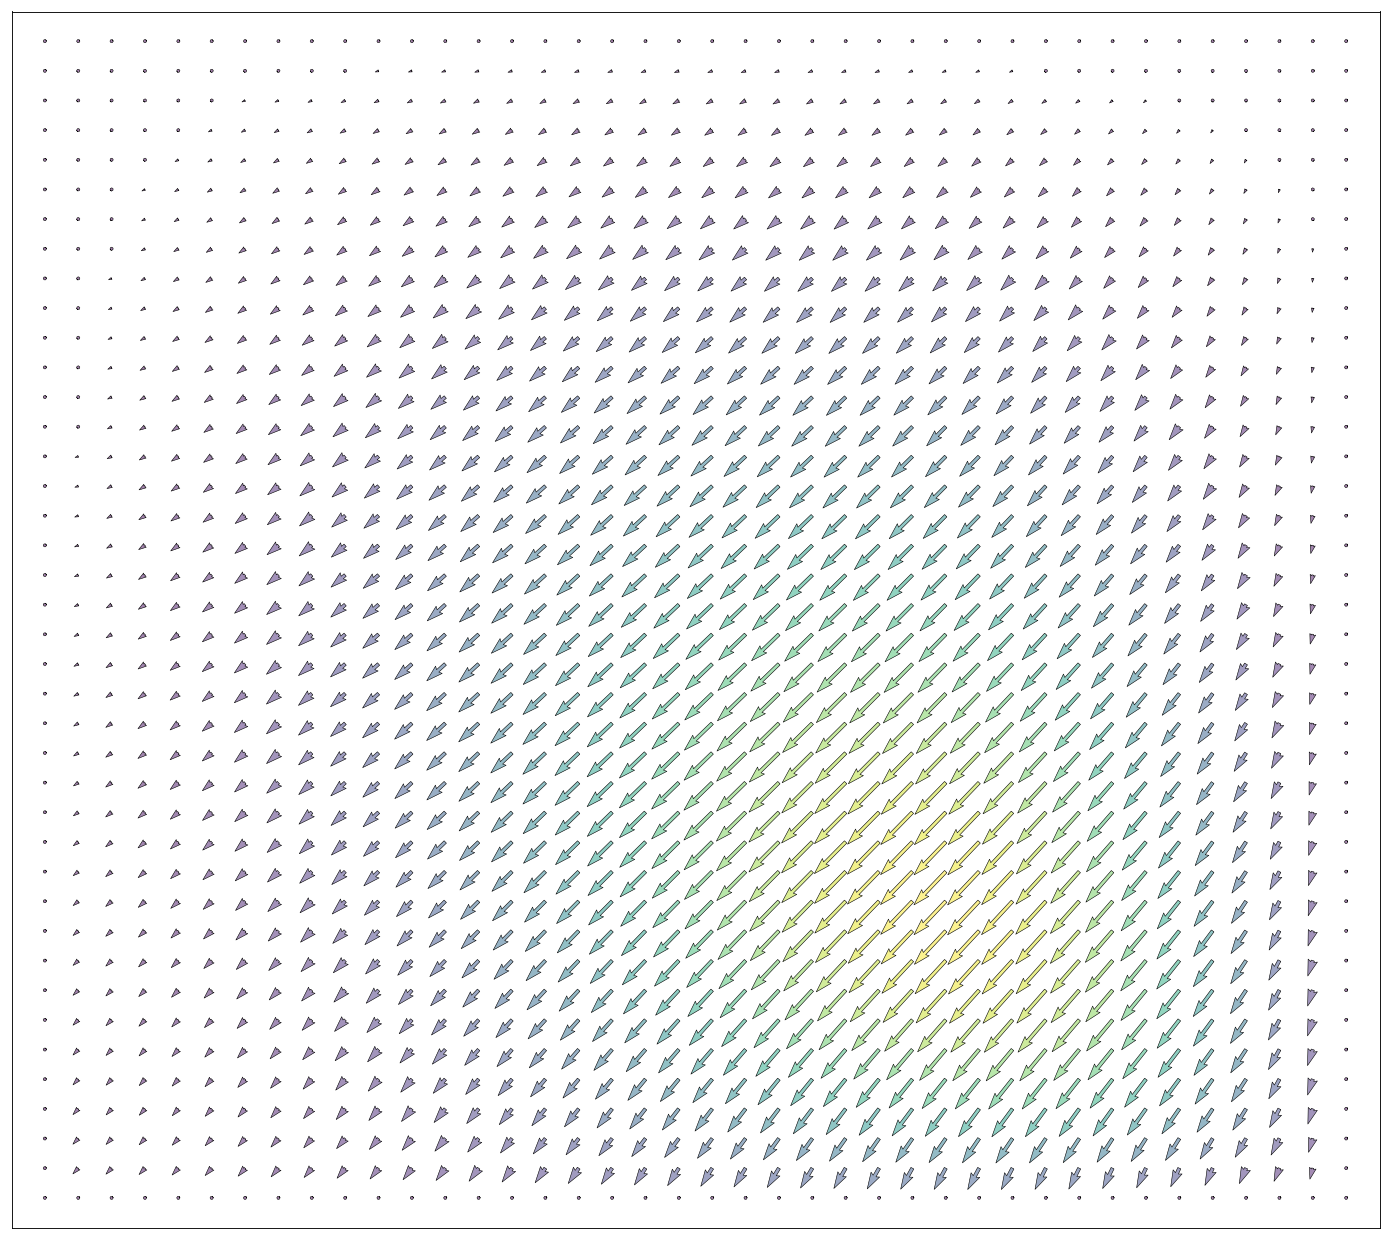

In [147]:
mag = u**2 + v**2

X, Y = np.mgrid[0:h, 0:w]
R = mag
U, V = v, u

fig=plt.figure(figsize=(18, 16), dpi= 80, facecolor='w', edgecolor='k')

plt.axes([0.025, 0.025, 0.95, 0.95])
plt.quiver(X, Y, U, V, R, alpha=.5)
plt.quiver(X, Y, U, V, edgecolor='k', facecolor='None', linewidth=.5)

plt.xlim(-1, w)
plt.xticks(())
plt.ylim(-1, h)
plt.yticks(())

plt.show()

In [9]:
# set up BC & IC
for i in range(w):
    for j in range(h):
        #u[i,j] = np.random.random()*1e-100
        #v[i,j] = np.random.random()*1e-100#np.cos((i-w/2)/w*2*np.pi)/10000000
        u[i,j] = np.random.random()/10
        v[i,j] = (np.exp(-(i-w/2)**2/(2*(j/2+10)))*10+np.random.random()/10)*np.exp(-(j/h)**2)
        
        if (i-25)**2 + (j-20)**2 <= 6**2:
            u[i,j] = 0
            v[i,j] = 0
        
        p[i,j] = np.random.random()/10

In [126]:
# set up BC & IC
for i in range(w):
    for j in range(h):
        if j != 0 and j != h-1:
            u[i,j] = i/w*100
        else:
            u[i,j] = 0
        v[i,j] = 0
        p[i,j] = 0

In [9]:
# set up BC & IC
for i in range(w):
    for j in range(h):
        if j != 0 and j != h-1:
            v[i,j] = i/w
        else:
            v[i,j] = 0
        u[i,j] = 0
        p[i,j] = 0

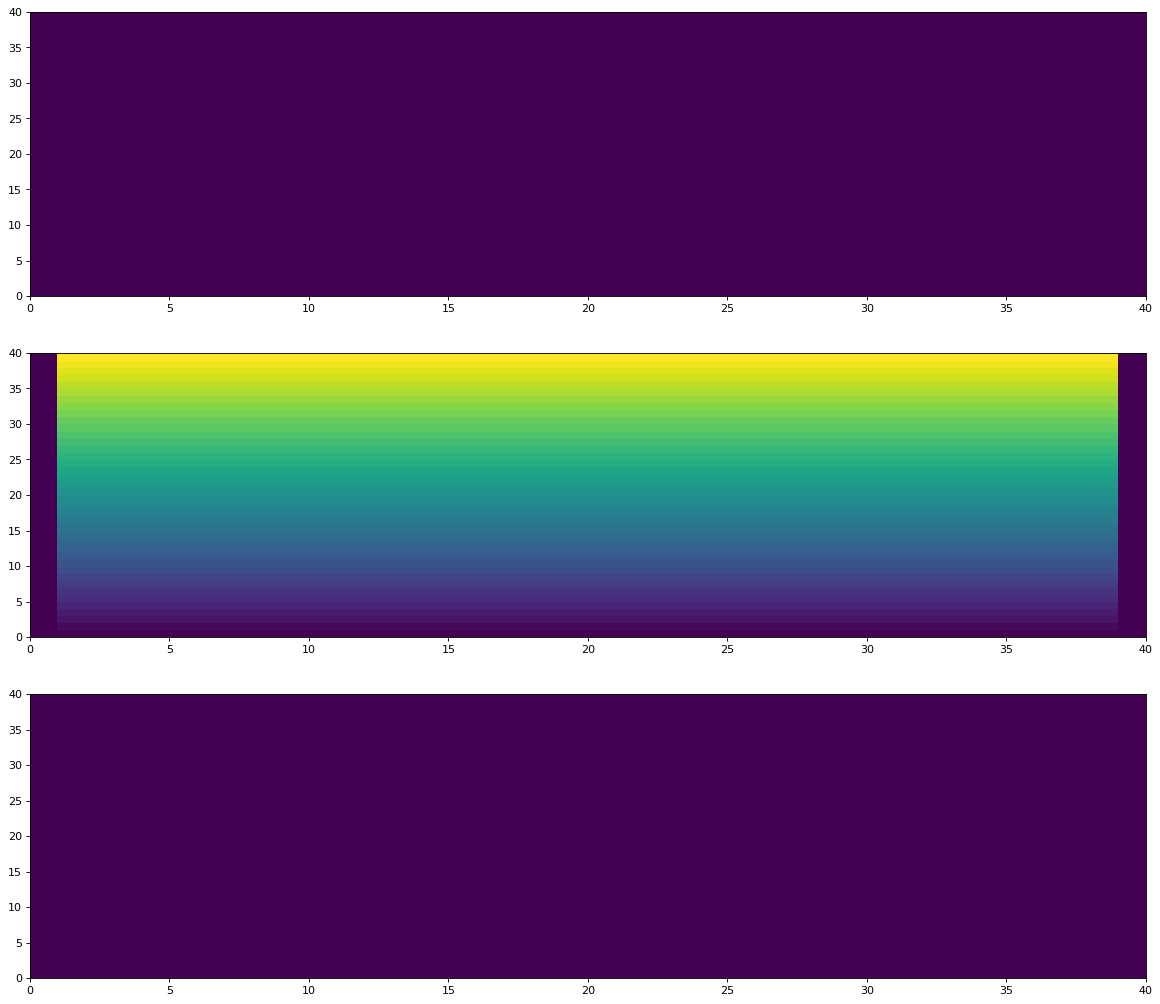

In [10]:
fig=plt.figure(figsize=(18, 16), dpi= 80, facecolor='w', edgecolor='k')

plt.subplot(3,1,1)
plt.pcolor(u)
plt.subplot(3,1,2)
plt.pcolor(v)
plt.subplot(3,1,3)
plt.pcolor(p)
